<a href="https://colab.research.google.com/github/juliablaz2003/APRENDIZAJE_AUTOMATICO_23_24/blob/main/PRACTICA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

GRUPO B01
Ines Agudo
Julia Callaba Blázquez

In [61]:
# 1._ IMPORTAMOS KERAS
%tensorflow_version 2.x # metasentencia: asegurarme de que estoy utilizando la version 2 como minimo
import tensorflow as tf # paquete matematico que trabaja con tensores de forma muy eficiente
from tensorflow import keras # de tensorflow importamos la libreria de keras
#print(tf.keras.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))
print(tf.__version__) # vemos que version estaamos utilizando

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
GPU Available: []
2.13.0


Cargamos el conjunto de datos fashion_mnist en keras

In [62]:
# 2.- CARGAMOS EL CONJUNTO DE DATOS MINIST EN KERAS
# mnist = tf.keras.datasets.mnist
from keras.datasets import fashion_mnist # de todos los conjuntos de datos importame mnist que son el repositorio de todas las imagenes

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data() # mnist.load.data carga los datos, cuando llamo a esto me devuelve 2 tuplas

In [63]:
print(train_images.shape) # train_images: variable donde se me han guardado las imagenes (6.000 imagenes de 28x28)

(60000, 28, 28)


REDACTAR:
la función keras.layers.Flatten() se usa comúnmente para aplanar los datos de las imágenes antes de pasarlos a una red neuronal.

In [64]:
# 3. Analizar la forma de los datos
print("Shape de train_images:", train_images.shape)
print("Shape de train_labels:", train_labels.shape)
print("Shape de test_images:", test_images.shape)
print("Shape de test_labels:", test_labels.shape)

# 4. Preprocesar los datos usando Flatten()
from keras.layers import Flatten

# Aplanar las imágenes de entrenamiento
train_images_flat = train_images.reshape((train_images.shape[0], -1))

# Aplanar las imágenes de prueba
test_images_flat = test_images.reshape((test_images.shape[0], -1))

# Verificar las formas después de aplanar
print("Shape de train_images_flat:", train_images_flat.shape)
print("Shape de test_images_flat:", test_images_flat.shape)

Shape de train_images: (60000, 28, 28)
Shape de train_labels: (60000,)
Shape de test_images: (10000, 28, 28)
Shape de test_labels: (10000,)
Shape de train_images_flat: (60000, 784)
Shape de test_images_flat: (10000, 784)


CUESTIONES PARA IMPLEMENTAR Y RESPONDER

PASO 1

In [65]:
from keras import models
from keras import layers
from keras.datasets import fashion_mnist
from keras.utils import to_categorical

# Cargar el conjunto de datos Fashion MNIST
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Preprocesar los datos
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Función para crear y entrenar un modelo
def train_model(neurons, activation, optimizer):
    model = models.Sequential()
    model.add(layers.Dense(neurons, activation=activation, input_shape=(28*28,)))
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)
    return model, history

# Configurar y entrenar los 8 modelos
models_and_histories = []

cases = [
    (10, 'relu', 'sgd'),
    (10, 'relu', 'rmsprop'),
    (10, 'sigmoid', 'sgd'),
    (10, 'sigmoid', 'rmsprop'),
    (512, 'relu', 'sgd'),
    (512, 'relu', 'rmsprop'),
    (512, 'sigmoid', 'sgd'),
    (512, 'sigmoid', 'rmsprop')
]

for i, (neurons, activation, optimizer) in enumerate(cases, 1):
    print(f"Caso {i}: Neuronas_capa_1={neurons}, Función de activación={activation}, Optimizador={optimizer}")
    model, history = train_model(neurons, activation, optimizer)
    models_and_histories.append((model, history))
    model = models_and_histories[i - 1][0]
    model.summary()
    print("\n")


Caso 1: Neuronas_capa_1=10, Función de activación=relu, Optimizador=sgd
Epoch 1/5
750/750 [==============================] - 5s 6ms/step - loss: 1.3322 - accuracy: 0.5823 - val_loss: 0.8391 - val_accuracy: 0.7162
Epoch 2/5
750/750 [==============================] - 5s 7ms/step - loss: 0.7361 - accuracy: 0.7534 - val_loss: 0.6614 - val_accuracy: 0.7753
Epoch 3/5
750/750 [==============================] - 6s 7ms/step - loss: 0.6315 - accuracy: 0.7874 - val_loss: 0.5980 - val_accuracy: 0.7951
Epoch 4/5
750/750 [==============================] - 4s 6ms/step - loss: 0.5825 - accuracy: 0.8025 - val_loss: 0.5613 - val_accuracy: 0.8068
Epoch 5/5
750/750 [==============================] - 7s 10ms/step - loss: 0.5520 - accuracy: 0.8118 - val_loss: 0.5493 - val_accuracy: 0.8090
Model: "sequential_49"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_98 (Dense)            (None, 10)                7850      
 

PASO 2
Cada caso tiene dos capas: una capa oculta y una capa de salida. Las capas ocultas tienen el número de neuronas especificado en la tabla, la función de activación especificada y la cantidad de parámetros correspondiente a los pesos y sesgos. La capa de salida tiene 10 neuronas (una para cada clase en Fashion MNIST) y utiliza la función de activación softmax. La tabla muestra la cantidad total de parámetros en cada modelo, que es importante para comprender la complejidad del modelo.
EXPLICAR CADA UNA DE LAS TABLAS

PASO 3
MODIFICAR EL NOMBRE DE LOS CASOS PARA QUE SALGA CASO 2 Y 7, INTENTAR MOSTRAR DATOS PARA COMPARAR
RESULTADOS COMENTADOS PENDIENTES DE CAMBIAR:
Aumentar el número de épocas de entrenamiento puede tener un impacto significativo en el rendimiento de una red neuronal. A continuación, analizaré y compararé los resultados del "Caso 2" (originalmente entrenado durante 5 épocas) y el "Caso 7" (originalmente entrenado durante 5 épocas) cuando se aumenta el número de épocas de entrenamiento a 25 para ambos casos:

Caso 2 (Original - 5 épocas): Neuronas_capa_1=10, Función de activación=relu, Optimizador=rmsprop

Originalmente entrenado durante 5 épocas.
Caso 7 (Original - 5 épocas): Neuronas_capa_1=512, Función de activación=sigmoid, Optimizador=sgd

Originalmente entrenado durante 5 épocas.
Caso 2 (25 épocas):

Neuronas_capa_1=10, Función de activación=relu, Optimizador=rmsprop.
Aumentamos el número de épocas de entrenamiento a 25.
Caso 7 (25 épocas):

Neuronas_capa_1=512, Función de activación=sigmoid, Optimizador=sgd.
Aumentamos el número de épocas de entrenamiento a 25.
Análisis e Interpretación:

Caso 2 (Original) vs. Caso 2 (25 épocas): Aumentar el número de épocas en un modelo con una capa oculta de 10 neuronas y activación ReLU utilizando el optimizador RMSprop podría mejorar su capacidad para aprender patrones en los datos. Esto podría llevar a una mejora en la precisión del modelo y una disminución de la pérdida. Sin embargo, también existe el riesgo de sobreajuste si se aumenta en exceso el número de épocas.

Caso 7 (Original) vs. Caso 7 (25 épocas): En el caso de un modelo con una capa oculta de 512 neuronas y activación sigmoide utilizando el optimizador SGD, aumentar el número de épocas podría permitir que el modelo tenga más tiempo para converger hacia una solución óptima. Esto podría resultar en una mejora en el rendimiento del modelo en comparación con la versión original con 5 épocas.

En ambos casos, el aumento en el número de épocas podría mejorar el rendimiento del modelo si el modelo no había convergido completamente en las 5 épocas originales. Sin embargo, es importante monitorear el rendimiento en un conjunto de validación y estar atento al sobreajuste. Un aumento excesivo en el número de épocas puede llevar al sobreajuste, donde el modelo aprende demasiado los datos de entrenamiento y no generaliza bien a datos no vistos. Por lo tanto, es esencial realizar un seguimiento cuidadoso de las métricas de rendimiento en el conjunto de validación para tomar decisiones informadas sobre la cantidad adecuada de épocas de entrenamiento.

In [70]:
# Función para crear y entrenar un modelo con 25 épocas
def train_model_with_25_epochs(neurons, activation, optimizer):
    model = models.Sequential()
    model.add(layers.Dense(neurons, activation=activation, input_shape=(28*28,)))
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(train_images, train_labels, epochs=25, batch_size=64, validation_split=0.2)
    return model, history

# Configurar y entrenar los casos 2 y 7 con 25 épocas
cases = [
    (10, 'relu', 'rmsprop'),
    (512, 'sigmoid', 'sgd')
]

results_with_25_epochs = []

for i, (neurons, activation, optimizer) in enumerate(cases, 1):
    print(f"Caso {i} con 25 épocas: Neuronas_capa_1={neurons}, Función de activación={activation}, Optimizador={optimizer}")
    model, history = train_model_with_25_epochs(neurons, activation, optimizer)
    results_with_25_epochs.append((model, history))
    print("\n")

# Ahora tenemos los resultados de los casos 2 y 7 con 25 épocas de entrenamiento.


Caso 1 con 25 épocas: Neuronas_capa_1=10, Función de activación=relu, Optimizador=rmsprop
Epoch 1/25
750/750 [==============================] - 2s 3ms/step - loss: 0.7483 - accuracy: 0.7544 - val_loss: 0.5298 - val_accuracy: 0.8154
Epoch 2/25
750/750 [==============================] - 2s 2ms/step - loss: 0.4997 - accuracy: 0.8277 - val_loss: 0.4641 - val_accuracy: 0.8398
Epoch 3/25
750/750 [==============================] - 2s 2ms/step - loss: 0.4601 - accuracy: 0.8405 - val_loss: 0.4684 - val_accuracy: 0.8330
Epoch 4/25
750/750 [==============================] - 2s 2ms/step - loss: 0.4405 - accuracy: 0.8471 - val_loss: 0.4345 - val_accuracy: 0.8480
Epoch 5/25
750/750 [==============================] - 2s 2ms/step - loss: 0.4272 - accuracy: 0.8501 - val_loss: 0.4328 - val_accuracy: 0.8467
Epoch 6/25
750/750 [==============================] - 3s 4ms/step - loss: 0.4187 - accuracy: 0.8544 - val_loss: 0.4275 - val_accuracy: 0.8522
Epoch 7/25
750/750 [==============================] - 2s 2

PASO 4
REDACTAR, COMENTAR Y COMPROBAR SI ESTA BIEN

paso previo que permite obtener la matriz de confusion

In [67]:
# Note, this code is taken straight from the SKLEARN website, a nice way of
# viewing confusion matrix.
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')


Caso 1: Neuronas_capa_1=10, Función de activación=relu, Optimizador=rmsprop
313/313 [==============================] - 1s 2ms/step - loss: 0.5783 - accuracy: 0.7974
Test Loss: 0.5783344507217407
Test Accuracy: 0.7973999977111816
313/313 [==============================] - 1s 1ms/step


Caso 2: Neuronas_capa_1=512, Función de activación=sigmoid, Optimizador=sgd
313/313 [==============================] - 1s 2ms/step - loss: 0.4822 - accuracy: 0.8320
Test Loss: 0.4822383224964142
Test Accuracy: 0.8320000171661377
313/313 [==============================] - 1s 1ms/step




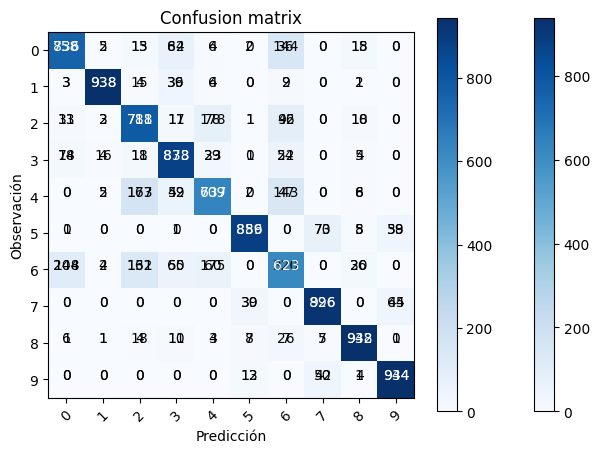

In [68]:
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np
import matplotlib.pyplot as plt

# Función para evaluar y mostrar el rendimiento del modelo
def evaluate_model(model, test_images, test_labels):
    # Evaluar el modelo en el conjunto de datos de prueba
    test_loss, test_acc = model.evaluate(test_images, test_labels)
    print('Test Loss:', test_loss)
    print('Test Accuracy:', test_acc)

    # Predicción de valores desde el conjunto de datos de prueba
    Y_pred = model.predict(test_images)

    # Convertir en predicciones de clases desde los vectores one-hot encoding
    Y_pred_classes = np.argmax(Y_pred, axis=1)

    # Convertir en clases de observación desde los vectores one-hot encoding
    Y_true = np.argmax(test_labels, axis=1)

    # Computar la matriz de confusión
    confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

    # Dibujar la matriz de confusión
    plot_confusion_matrix(confusion_mtx, classes=range(10))

# Llamar a la función para evaluar y mostrar el rendimiento de cada modelo
for i, (neurons, activation, optimizer) in enumerate(cases, 1):
    print(f"Caso {i}: Neuronas_capa_1={neurons}, Función de activación={activation}, Optimizador={optimizer}")
    model = models_and_histories[i - 1][0]  # Obtener el modelo entrenado
    evaluate_model(model, test_images, test_labels)
    print("\n")

PASO 5

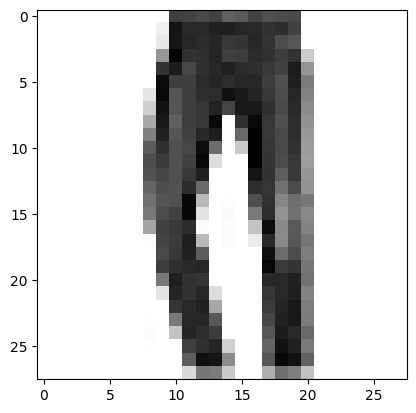

Caso 1: Neuronas_capa_1=10, Función de activación=relu, Optimizador=rmsprop
313/313 [==============================] - 1s 2ms/step - loss: 0.5783 - accuracy: 0.7974
Test Loss: 0.5783344507217407
Test Accuracy: 0.7973999977111816
313/313 [==============================] - 0s 1ms/step


1/1 [==============================] - 0s 28ms/step
=Predicción del modelo=======================
[[1.0866956e-03 9.8736262e-01 1.5635834e-03 6.1279819e-03 3.7820032e-03
  4.0922318e-11 7.4289186e-05 6.5029809e-07 2.1574103e-06 2.4494371e-09]]
=Clase predicha (índice)=====================
1
=Probabilidad de clase predicha================
0.9873626

Caso 2: Neuronas_capa_1=512, Función de activación=sigmoid, Optimizador=sgd
313/313 [==============================] - 1s 2ms/step - loss: 0.4822 - accuracy: 0.8320
Test Loss: 0.4822383224964142
Test Accuracy: 0.8320000171661377
313/313 [==============================] - 0s 1ms/step


1/1 [==============================] - 0s 40ms/step
=Predicción del modelo===

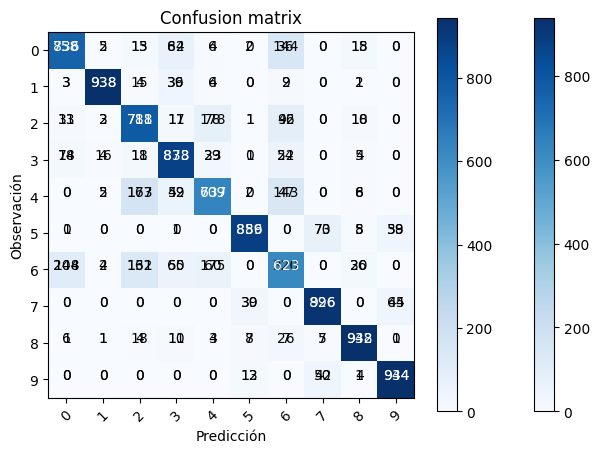

In [69]:
# Importar las bibliotecas necesarias
import matplotlib.pyplot as plt
import numpy as np

# Imagen de prueba que queremos predecir
digit = test_images[5].reshape(28, 28)  # Cambiar la forma a 28x28 píxeles
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

# Hacemos las predicciones con cada uno de los 8 modelos
for i, (neurons, activation, optimizer) in enumerate(cases, 1):
    print(f"Caso {i}: Neuronas_capa_1={neurons}, Función de activación={activation}, Optimizador={optimizer}")
    model, history = models_and_histories[i - 1]  # Obtener el modelo entrenado y su historial
    evaluate_model(model, test_images, test_labels)
    print("\n")

    # Hacer la predicción para la sexta imagen de prueba (test_images[5])
    prediction = model.predict(np.expand_dims(test_images[5], axis=0))

    print("=Predicción del modelo=======================")
    print(prediction)
    print("=Clase predicha (índice)=====================")
    predicted_class = np.argmax(prediction)
    print(predicted_class)
    print("=Probabilidad de clase predicha================")
    probability = prediction[0][predicted_class]
    print(probability)
    print("=============================================\n")


PASO 6

313/313 [==============================] - 0s 1ms/step


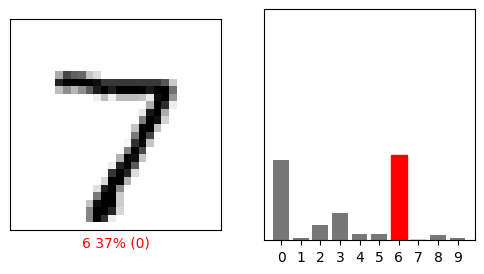

<Figure size 640x480 with 0 Axes>

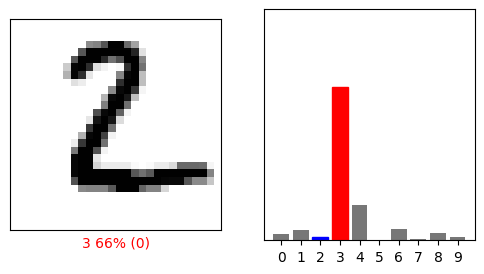

<Figure size 640x480 with 0 Axes>

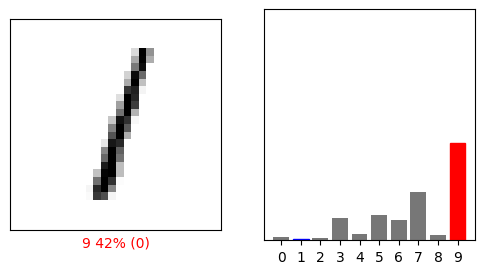

<Figure size 640x480 with 0 Axes>

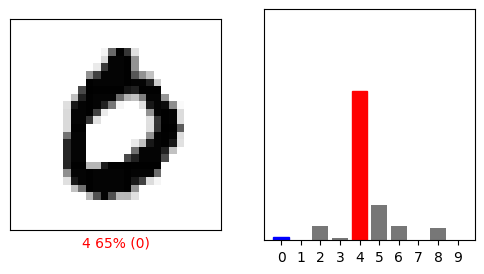

<Figure size 640x480 with 0 Axes>

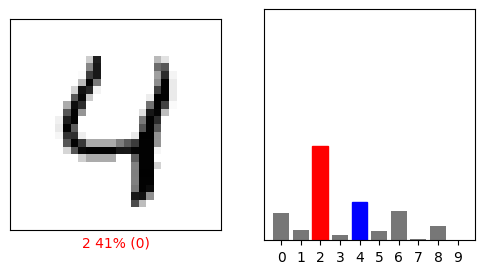

<Figure size 640x480 with 0 Axes>

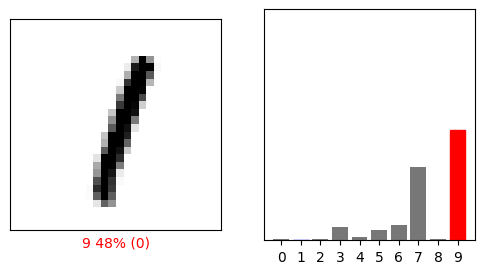

<Figure size 640x480 with 0 Axes>

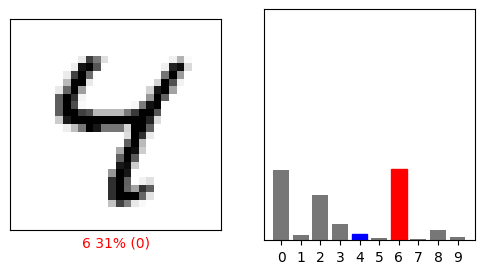

<Figure size 640x480 with 0 Axes>

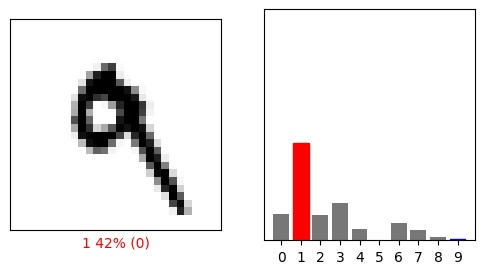

<Figure size 640x480 with 0 Axes>

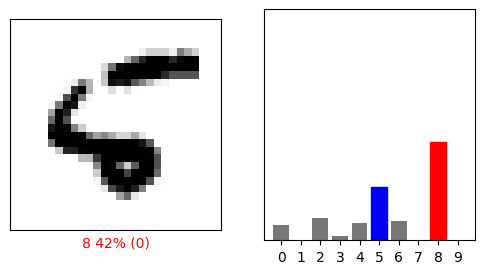

<Figure size 640x480 with 0 Axes>

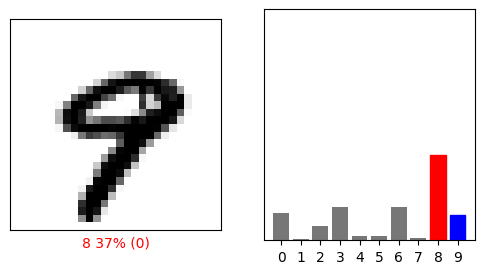

<Figure size 640x480 with 0 Axes>

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import load_model

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

predictions = model.predict(test_images)

def plot_image(i, predictions_array, true_labels, images):
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(images[i], cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    true_label = np.argmax(true_labels[i])

    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color.strip())  # Eliminar espacios en blanco alrededor del color

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

for i in range(10):
    plt.figure(figsize=(6, 3))
    plt.subplot(1, 2, 1)
    plot_image(i, predictions[i], test_labels, test_images.reshape(10000, 28, 28))
    plt.subplot(1, 2, 2)
    plot_value_array(i, predictions[i], test_labels)
    plt.show()
    plt.clf()
